## Predicting Heart Disease using Machine Learning

In [1]:
# Regular EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models for scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve

## Loading Data

In [2]:
df = pd.read_csv('Data/heart-disease.csv')
df.shape

(303, 14)

In [3]:
# EDA
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

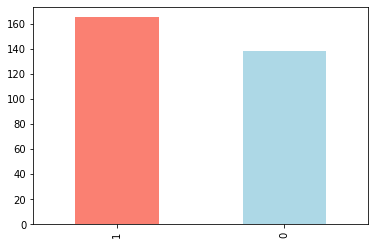

In [8]:
df['target'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue'])

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## heart disease frequency according to sex

In [10]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


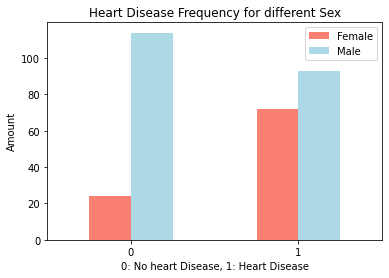

In [12]:
pd.crosstab(df.target, df.sex).plot(kind = 'bar', color = ['salmon', 'lightblue'])
plt.title("Heart Disease Frequency for different Sex")
plt.xlabel('0: No heart Disease, 1: Heart Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 0);

In [13]:
# Further Comparing independent variables
# Checking the variation of maximum heart rate according to their age and heart disease
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

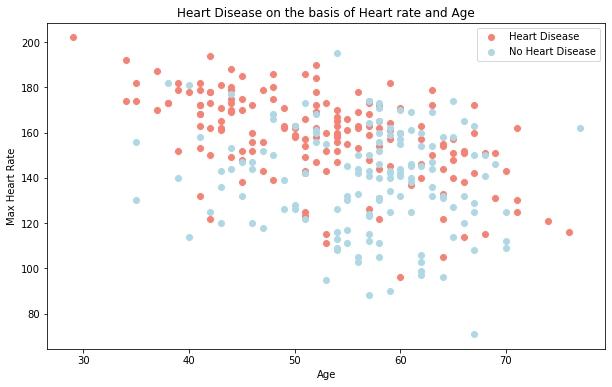

In [14]:
plt.figure(figsize = (10,6))
plt.scatter(df.age[df.target ==1], df.thalach[df.target ==1],color = 'salmon')
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color = 'lightblue')
plt.title('Heart Disease on the basis of Heart rate and Age')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Heart Disease', 'No Heart Disease'])
plt.show()

In [15]:
# Checking chest pain catefory with the target value
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


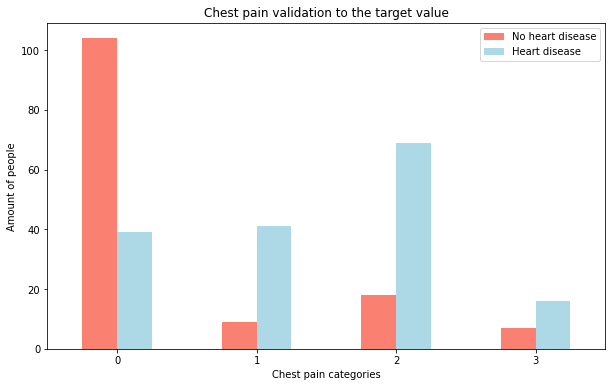

In [17]:
pd.crosstab(df.cp, df.target).plot.bar(figsize = (10,6),color = ['salmon', 'lightblue'])
plt.title("Chest pain validation to the target value")
plt.xlabel("Chest pain categories")
plt.ylabel("Amount of people")
plt.xticks(rotation = 0)
plt.legend(['No heart disease', 'Heart disease'])
plt.show()

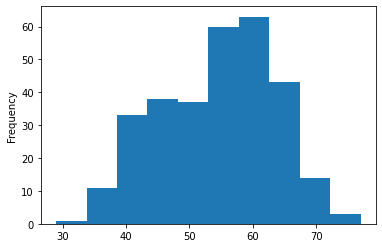

In [18]:
df.age.plot.hist();

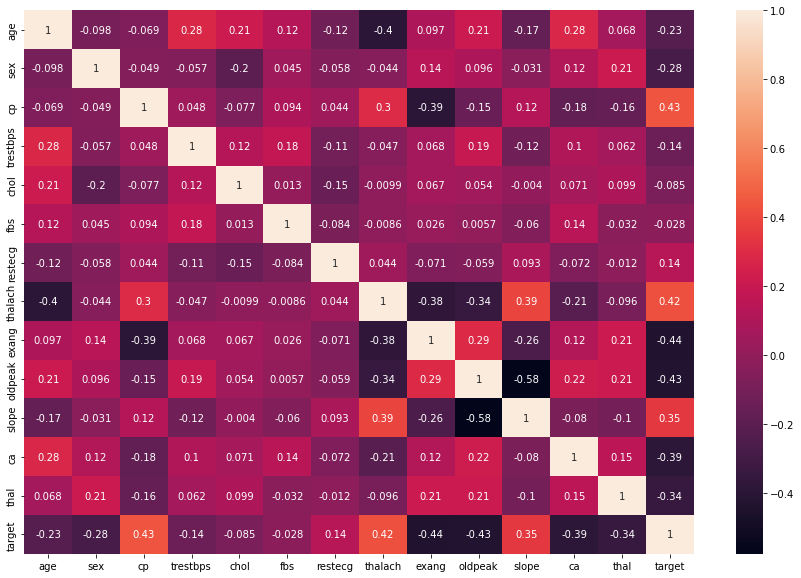

In [19]:
# Checking the relationship between the features
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show()

## Modelling 

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Preparing data for bulding models
X = df.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
len(X_train), len(X_test)

(242, 61)

In [40]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}
np.random.seed(4)

def evaluate_model(models, X_train, X_test, y_train, y_test):
    model_scores ={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
        

In [41]:
model_scores = evaluate_model(models, X_train, X_test, y_train, y_test)

/home/visaal/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
model_scores

{'Logistic Regression': 0.9016393442622951,
 'KNN': 0.5409836065573771,
 'Random Forest': 0.8852459016393442}

In [43]:
compared_models = pd.DataFrame(model_scores, index = ['accuracy'])

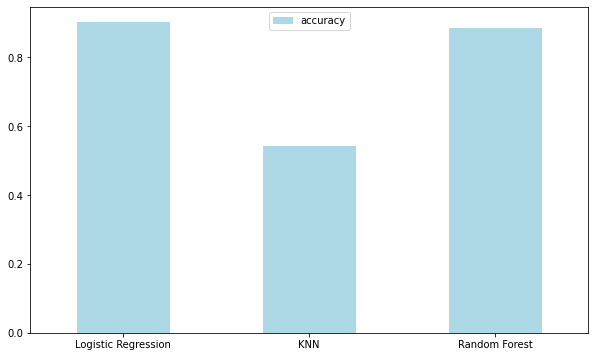

In [44]:
compared_models.T.plot.bar(figsize = (10,6), color = ['lightblue'])
plt.xticks(rotation = 0)
plt.show()

## Hyperparameters tuning to improve our models

In [46]:
train_scores = []
test_scores = []
neighbours = np.arange(1,21,1)
from sklearn.neighbors import KNeighborsClassifier

for i in neighbours:
    k_model = KNeighborsClassifier(n_neighbors = i)
    k_model.fit(X_train, y_train)
    train_score = k_model.score(X_train, y_train)
    test_score = k_model.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    






In [47]:
train_scores

[1.0,
 0.7892561983471075,
 0.78099173553719,
 0.7479338842975206,
 0.768595041322314,
 0.743801652892562,
 0.7396694214876033,
 0.7520661157024794,
 0.7520661157024794,
 0.7231404958677686,
 0.7107438016528925,
 0.6983471074380165,
 0.7066115702479339,
 0.7107438016528925,
 0.7024793388429752,
 0.7024793388429752,
 0.7024793388429752,
 0.6983471074380165,
 0.7148760330578512,
 0.6983471074380165]

In [48]:
test_scores

[0.5573770491803278,
 0.5409836065573771,
 0.5573770491803278,
 0.47540983606557374,
 0.5409836065573771,
 0.5245901639344263,
 0.5573770491803278,
 0.5901639344262295,
 0.5901639344262295,
 0.6229508196721312,
 0.6557377049180327,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.639344262295082,
 0.639344262295082,
 0.6229508196721312,
 0.5901639344262295,
 0.6229508196721312]

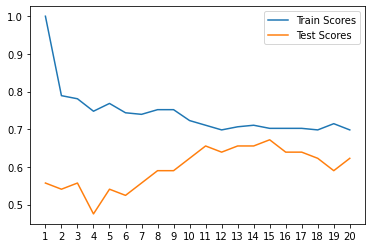

Model has highest accuracy: 67.21%


In [58]:
plt.plot(neighbours, train_scores, label = ("Train Scores"))
plt.plot(neighbours, test_scores, label = ("Test Scores"))
plt.xticks(neighbours)
plt.legend()
plt.show()
print(f"Model has highest accuracy: {max(test_scores)*100:.2f}%")

In [69]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [70]:
# Dropping KNN for its low accuracy and further tuning Logistic regression and Random Forest
# parameter grid for logistic regression
lr_grid = {"C": np.logspace(-4,4,20),
           "solver": ["liblinear"]}

rf_grid = {"n_estimators": [100, 200, 500, 800],
           "max_depth": [None, 2, 5, 9],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

In [77]:
# Tuning Logistic Regression with Randomized Search CV
np.random.seed(4)
rs_log_reg = RandomizedSearchCV(estimator = LogisticRegression(),
                                param_distributions=lr_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True
                                )
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [72]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [73]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [78]:
# Tuning Random Forest with RandomizedSearchCV
np.random.seed(4)
rs_rf = RandomizedSearchCV(estimator = RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True
                                )
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 2, 5, 9],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': [100, 200, 500, 800]},
                   verbose=True)

In [75]:
rs_rf.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 17,
 'max_depth': 2}

In [76]:
rs_rf.score(X_test, y_test)

0.8852459016393442

In [83]:
# Tuning Logistic Regression with GridSearchCV
np.random.seed(4)
gs_log_reg = GridSearchCV(estimator = LogisticRegression(),
                                param_grid=lr_grid,
                                cv = 5,
                                verbose = True
                                )
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [84]:
gs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [85]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [87]:
rf_gsgrid = {"n_estimators": [200, 500, 800],
           "max_depth": [None, 2],
           "min_samples_split": np.arange(10,14,2),
           "min_samples_leaf": np.arange(15,20,2)}

In [88]:
# Tuning Random Forest with RandomizedSearchCV
np.random.seed(4)
gs_rf = GridSearchCV(estimator = RandomForestClassifier(),
                                param_grid=rf_gsgrid,
                                cv = 5,
                                verbose = True
                                )
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 2],
                         'min_samples_leaf': array([15, 17, 19]),
                         'min_samples_split': array([10, 12]),
                         'n_estimators': [200, 500, 800]},
             verbose=True)

In [89]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 15,
 'min_samples_split': 10,
 'n_estimators': 500}

In [90]:
gs_rf.score(X_test, y_test)

0.8852459016393442

## Evaluating our model

In [91]:
y_preds = gs_rf.predict(X_test)

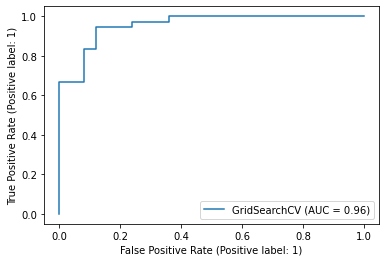

In [96]:
# ROC curve and AUC
plot_roc_curve(gs_rf, X_test, y_test);

Text(20.5, 0.5, 'Predicted label')

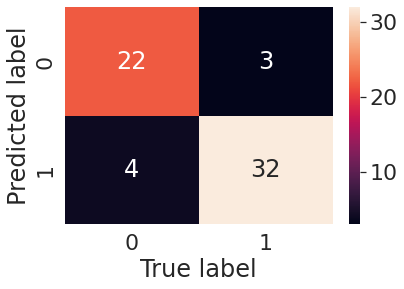

In [105]:
# Evaluating using confusion matrix
conf_matrix = confusion_matrix(y_test, y_preds)
sns.set_theme(font_scale = 2)
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.heatmap(conf_matrix, annot = True);
plt.xlabel("True label")
plt.ylabel("Predicted label")

In [107]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.91      0.89      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [108]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 15,
 'min_samples_split': 10,
 'n_estimators': 500}

In [118]:
np.random.seed(4)
clf = RandomForestClassifier(max_depth= None,
                             min_samples_leaf= 15,
                             min_samples_split= 10,
                             n_estimators= 500)

In [121]:
np.random.seed(4)
cv_acc = cross_val_score(clf, X, y, cv = 5)
np.mean(cv_acc)

0.8282513661202187

In [143]:
np.random.seed(4)
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring="accuracy")
cv_accuracy = np.mean(cv_acc)

In [129]:
np.random.seed(4)
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring="precision")
cv_precision = np.mean(cv_acc)

In [130]:
np.random.seed(4)
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring="recall")
cv_recall = np.mean(cv_acc)

In [131]:
np.random.seed(4)
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring="f1")
cv_f1 = np.mean(cv_acc)

In [155]:

cv_metrics = pd.DataFrame({"Accuracy": cv_accuracy,
                         "Precision": cv_precision,
                         "Recall": cv_recall,
                         "F1 score": cv_f1}, index = ["Values"])

In [156]:
cv_metrics

,Accuracy,Precision,Recall,F1 score
Values,0.828251,0.825129,0.872727,0.847591


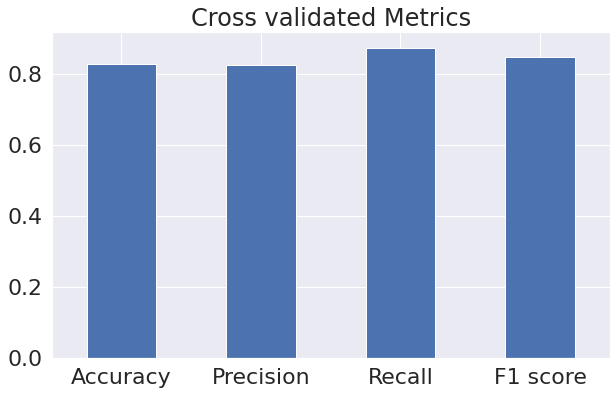

In [159]:
cv_metrics.T.plot.bar(title = "Cross validated Metrics", figsize = (10,6), legend = False)
plt.xticks(rotation = 0)
plt.show()